# **Churn de uma empresa de telecomunicações**

---

Um dos medos dos gestores de marketing das operadoras de telefonia, quando do momento de aprovação da portabilidade, foi o aumento incontrolável do churn. Numa definição bem rasteira, churn é a taxa de rotatividade dos clientes, também conhecida como deserção ou, simplesmente, abandono da empresa pelo cliente, que irá para um concorrente.

É claro que o cliente pode ter um milhão de motivos para deixar uma empresa. No entanto, é obrigação de todo gestor descobrir por que ele tomou essa decisão. Dessa forma, é possível elaborar estratégias para reverter a situação ou tomar precauções para que ela nunca mais se repita.

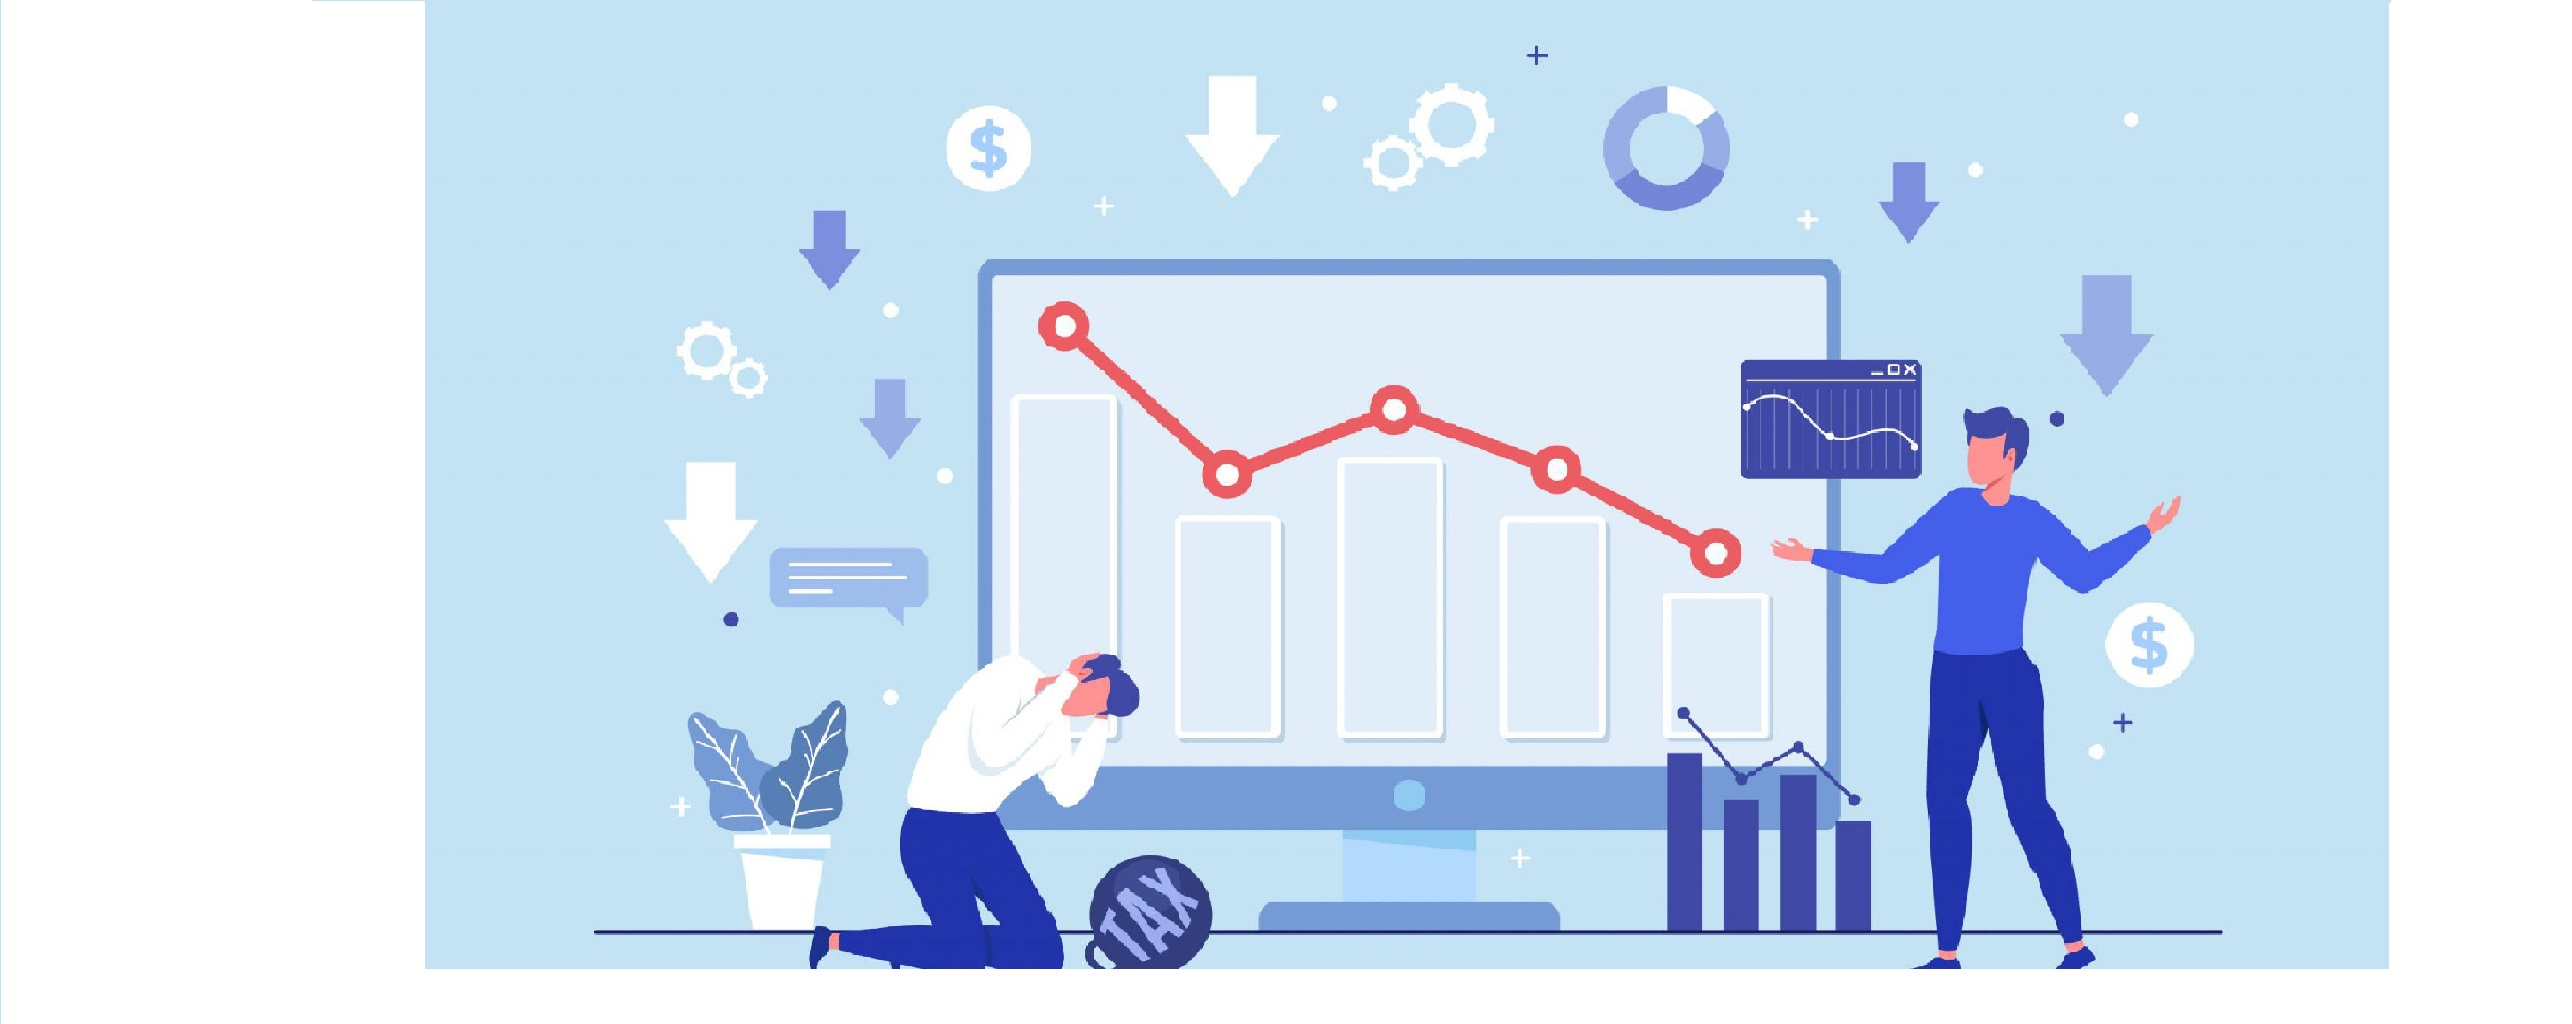

A perda de clientes é ruim para qualquer tipo de empresa, pois significa que algo não está satisfatório. Em provedores de internet, sendo um serviço considerado essencial, os cancelamentos devem ser investigados e identificados o quanto antes, pois o valor correspondente às mensalidades compõe o saldo de receita. Sem um planejamento financeiro adequado, o volume de perdas pode causar um grande furo no caixa, por isso, a importância de acompanhar os níveis do churn. 

**Situação Problema:**

>Uma empresa de telecom tem clientes de vários serviços diferentes, entre os principais: internet e telefone. 
O problema é que, analisando o histórico dos clientes dos últimos anos, você percebeu que a empresa está com Churn dos clientes. Isso representa uma perda para a empresa. O que a empresa precisa fazer para resolver isso?



## **Coleta dos dados**

As
informações que vão alimentar nossa análise, foram extraídas
do site Kaggle([link](https://www.kaggle.com/radmirzosimov/telecom-users-dataset)). Os dados são referentes a clientes serviços
de telecomunicações e seus hábitos de consumo, produtos, etc.

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('telecom_users.csv')

## **Análise exploratória dos dados**

In [ ]:
display(df)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


**Dicionário de variáveis**


*   customerID - Código de identificação do cliente
*   gender - Gênero do cliente
*   SeniorCitizen - Cliente aposentado
*   Partner - Cliente casado
*   Dependents - Cliente dependente
*   tenure - Meses que a pessoa é cliente 
*   PhoneService - Possui serviço telefônico
*   MultipleLines - Cliente possui múltiplas linhas de telefone
*   InternetService - Qual provedor de serviço de Internet
*   OnlineSecurity - Possui segurança online ativo
*   OnlineBackup - Possui Backup online ativo
*   DeviceProtection - Cliente possui proteção de dispositivo ativo
*   TechSupport - Possui serviço de suporte técnico ativo
*   StreamingTV - Possui streaming de televisão ativo
*   StreamingMovies - Possui streaming de filme ativo
*   Contract - Tipo de contrato
*   PaymentMethod - Método de pagamento
*   MonthlyCharges - Pagamento mensal atual
*   TotalCharges - Custos totais pelo serviço prestado duante todo o tempo
*   Churn - Consumidor cancelou o serviço



## **Tratamento dos dados**

A coluna ***Unnamed 0***
além de não ter um rótulo que nos ajude a
entender de que se trata, possui números que
não seguem nenhum tipo de padrão Portanto,
pelo menos por enquanto, não nos é
interessante pois é uma informação
irrelevante

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


Com a coluna ***Unnamed 0*** excluída, devemos analisar um pouco mais a fundo as variáveis, tipos de dados que elas possuem e se existe alguma anomalia nos dados

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Analisando
nossa base conseguimos perceber que
temos 2 problemas


*   Dados faltantes na coluna Código
*   Coluna TotalCharges está classificada como
OBJECT e por se tratar de números, deveriam ser
classificadas como tal



In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

## **Analisando os dados**

Entender
seu problema é fundamental. Assim,
será possível orientar sua análise para resolver
o problema. 
Então
vamos lá!



> Nosso problema é:  

“Alto
índice de cancelamento de contratos”



> O
que eu quero:

“Entender
os principais motivos que levam ao
cancelamento para assim gerar um plano de
ação”

In [ ]:
display(df['Churn'].value_counts())
display(df['Churn'].value_counts(normalize=True).map('{:.1%}'.format))

No     4399
Yes    1587
Name: Churn, dtype: int64

No     73.5%
Yes    26.5%
Name: Churn, dtype: object

Ao analizarmos os dados, 73,5% dos clientes permaneceram com os serviços e 26,5% cancelaram os serviços, isso mostra que de mais de 26% dos clientes cancelaram os serviços.

In [ ]:
fig = px.histogram(df, x='tenure', color='Churn')
fig.show()
print(df.pivot_table(index='Churn', columns='tenure', aggfunc='count')['customerID'])

tenure    0      1      2     3     4   ...    68    69    70     71     72
Churn                                   ...                                
No      10.0  192.0   90.0  87.0  81.0  ...  81.0  71.0  80.0  147.0  304.0
Yes      NaN  318.0  104.0  82.0  73.0  ...   8.0   6.0  10.0    5.0    4.0

[2 rows x 73 columns]



Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e os meses que a pessoa é cliente tiramos as seguintes conclusões
> Análise:

Proporção
de Cancelamento Alta para
valores de Tenure baixo.

> Insights



*   Baixa qualidade no atendimento do pós
venda;
*   1 ª experiência com o cliente não é boa;

*   Captação de clientes falha;
-
Clientes desqualificados;
-
Expectativas erradas ao adquirir o
produto.



In [ ]:
fig = px.histogram(df, x='PaymentMethod', color='Churn')
fig.show()
display(df.pivot_table(index='Churn', columns='PaymentMethod', aggfunc='count')['customerID'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1084,1105,1104,1106
Yes,224,198,902,263


Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e os métodos de pagamentos tiramos as seguintes conclusões
> Análise:

Os
métodos automáticos tem uma taxa de
churn menor

> Insights



*   O Eletronic Check possui resultado muito
ruim. Se possível evitar;
*  Ideia oferecer benefícios caso a pessoa
escolha um método automático.


In [ ]:
fig = px.histogram(df, x='Contract', color='Churn')
fig.show()
display(df.pivot_table(index='Churn', columns='Contract', aggfunc='count')['customerID'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,1871,1128,1400
Yes,1398,148,41


Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e os tipos de contratos tiramos as seguintes conclusões


> Análise:

Contrato
Mensal com taxa de cancelamento
muito superior aos demais métodos de
pagamento

> Insights


*   Melhorar as condições comerciais dos
planos anuais para direcionar a pessoa
para estes casos.




In [ ]:
fig = px.histogram(df, x='TechSupport', color='Churn')
fig.show()
display(df.pivot_table(index='Churn', columns='TechSupport', aggfunc='count')['customerID'])

TechSupport,No,No internet service,Yes
Churn,,,
No,1738,1192,1469
Yes,1222,99,266


Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e os tipos de contratos tiramos as seguintes conclusões


> Análise:

Contrato
Mensal com taxa de cancelamento
muito superior aos demais métodos de
pagamento

> Insights


*   Melhorar as condições comerciais dos
planos anuais para direcionar a pessoa
para estes casos.

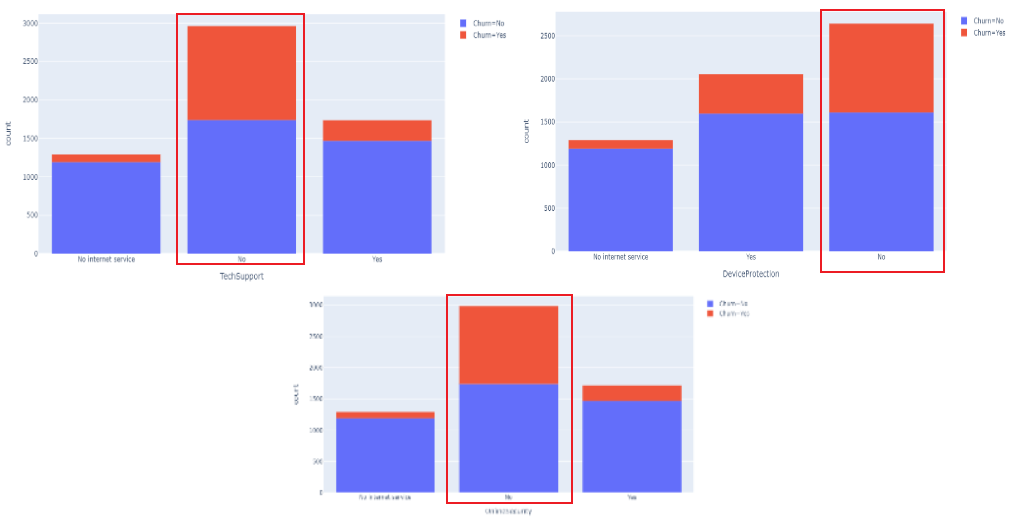

Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e serviços adicionais de suporte técnico, proteção de dispositivos e segurança online tiramos as seguintes conclusões


> Análise:

Clientes
que não possuem serviços
adicionais de Suporte Técnico, Proteção a
dispositivos e Segurança Online tendem a
cancelar mais.

> Insights


*   Todos os itens em algum nível falam
sobre aumentar a
confiabilidade/disponibilidade do serviço
recebido pelo cliente

In [12]:
fig = px.histogram(df, x='InternetService', color='Churn')
fig.show()
display(df.pivot_table(index='Churn', columns='InternetService', aggfunc='count')['customerID'])

InternetService,DSL,Fiber optic,No
Churn,,,
No,1671,1536,1192
Yes,397,1091,99


Com a análise obtida através do gráfico acima realcionando a quantidade de Churns e serviço de internet tiramos as seguintes conclusões


> Análise:

Clientes
que tem  fibra ótica como meio de comunicação tendem a
cancelar mais.

> Insights


*   A infraestrutura da fibra ótica pode estar com algum defeito, pois dos 2.627 clientes que tem essa infraestrutura 1.091 clientes cancelaram o serviço.